In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load data
df = pd.read_csv("/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/crc_variations_march_summary.tsv", sep="\t", header=0)

print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient         105 non-null    object 
 1   calls           105 non-null    int64  
 2   nonref_calls    105 non-null    int64  
 3   total_len_diff  105 non-null    int64  
 4   mean_len_dif    105 non-null    float64
 5   MSI             105 non-null    object 
 6   CMS             105 non-null    object 
 7   frac_nonref     105 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.7+ KB
None


,calls,nonref_calls,total_len_diff,mean_len_dif,frac_nonref
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,41339.542857,906.066667,5009.857143,5.237616,0.020727
std,17670.160149,704.542763,4533.182853,0.595977,0.012895
min,4616.000000,59.000000,298.000000,4.278351,0.007305
25%,30488.000000,421.000000,1936.000000,4.790698,0.013774
50%,36851.000000,618.000000,3205.000000,5.050847,0.016903
75%,48960.000000,1320.000000,7292.000000,5.615445,0.021271
max,82841.000000,4383.000000,30846.000000,7.037645,0.073878


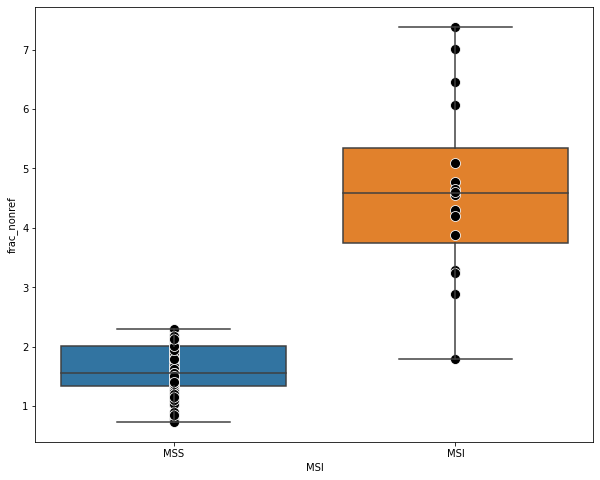

In [49]:
fig = plt.figure(figsize=[10, 8])

sns.boxplot(y=df.frac_nonref * 100, x=df.MSI)
sns.scatterplot(y=df.frac_nonref * 100, x=df.MSI, color='black', s=100)

plt.show()

In [54]:
X = np.array(df.frac_nonref).reshape(-1, 1) * 100
y = np.array(df.MSI)
lm = linear_model.LogisticRegression().fit(X, y)

lm.predict(X)
metrics.accuracy_score(y_true=y, y_pred=lm.predict(X))

0.9809523809523809

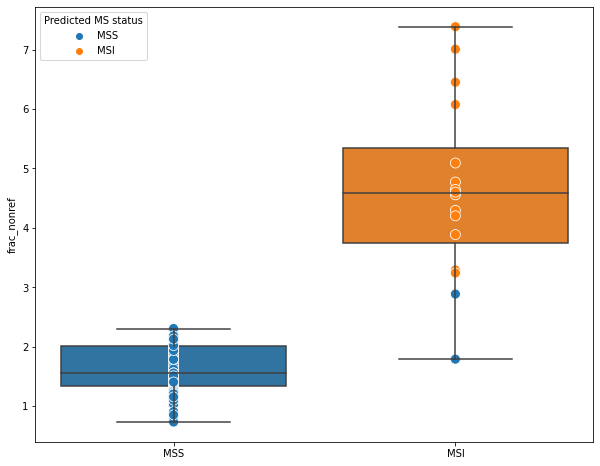

In [53]:
fig = plt.figure(figsize=[10, 8])

sns.boxplot(y=df.frac_nonref * 100, x=df.MSI)
sns.scatterplot(y=df.frac_nonref * 100, x=df.MSI, hue=lm.predict(X), s=100)
plt.legend(title='Predicted MS status')
plt.xlabel('')

plt.show()

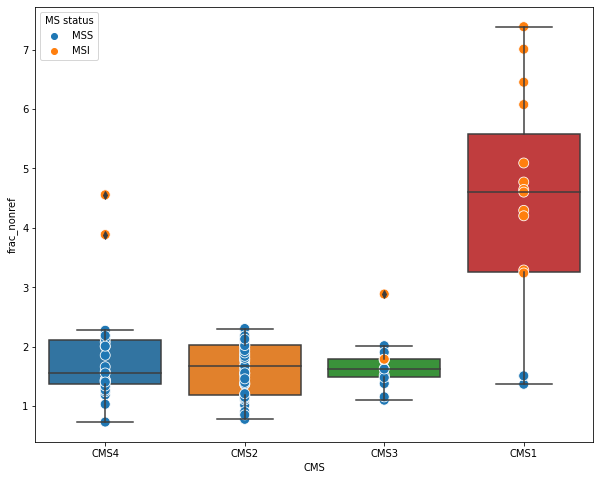

In [52]:
fig = plt.figure(figsize=[10, 8])

sns.boxplot(y=df.frac_nonref * 100, x=df.CMS)
sns.scatterplot(y=df.frac_nonref * 100, x=df.CMS, hue=df.MSI, s=100)
plt.legend(title='MS status')

plt.show()

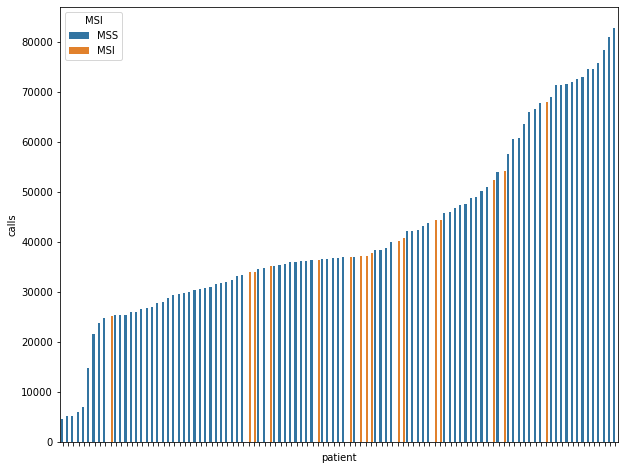

In [30]:
fig = plt.figure(figsize=[10, 8])

ax = sns.barplot(data=df.sort_values('calls'), x='patient', y='calls', hue='MSI')
ax.set(xticklabels=[])

plt.show()

In [65]:
list(df[df.calls < 25000].sort_values('calls').calls)

[4616, 5142, 5222, 6046, 7028, 14693, 21500, 23699, 24724]